In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = '/content/drive/MyDrive/Models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=SGD(lr=1e-5,momentum=0.9),metrics=['acc'])

inc_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
56/56 [==============================] - 290s 5s/step - loss: 1.3141 - acc: 0.4276 - val_loss: 0.8800 - val_acc: 0.5837
Epoch 2/150
56/56 [==============================] - 26s 467ms/step - loss: 0.8806 - acc: 0.5942 - val_loss: 0.6835 - val_acc: 0.7181
Epoch 3/150
56/56 [==============================] - 26s 465ms/step - loss: 0.7015 - acc: 0.7004 - val_loss: 0.5867 - val_acc: 0.7885
Epoch 4/150
56/56 [==============================] - 26s 471ms/step - loss: 0.6064 - acc: 0.7451 - val_loss: 0.5095 - val_acc: 0.8238
Epoch 5/150
56/56 [==============================] - 27s 487ms/step - loss: 0.5470 - acc: 0.7725 - val_loss: 0.4814 - val_acc: 0.8304
Epoch 6/150
56/56 [==============================] - 27s 483ms/step - loss: 0.5048 - acc: 0.7949 - val_loss: 0.4556 - val_acc: 0.8370
Epoch 7/150
56/56 [==============================] - 27s 489ms/step - loss: 0.4481 - acc: 0.8111 - val_loss: 0.4160 - val_acc: 0.8524
Epoch 8/150
56/56 [==============================] - 26s 472ms/s

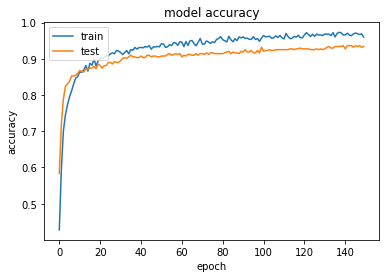

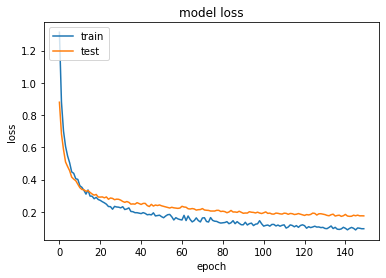

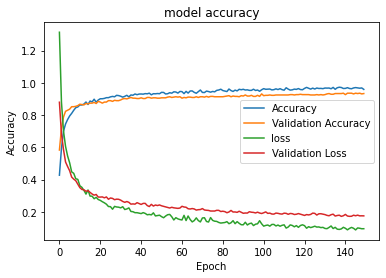

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(inc_history.history['loss'])
plt.plot(inc_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(inc_history.history['acc'])
plt.plot(inc_history.history['val_acc'])
plt.plot(inc_history.history['loss'])
plt.plot(inc_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()